In [1]:
!pip install autograd

import copy
import matplotlib.pyplot as plt
import math
import autograd.numpy as np

from autograd import grad

  Running setup.py bdist_wheel for autograd ... - done
  Stored in directory: /root/.cache/pip/wheels/72/6f/c2/40f130cca2c91f31d354bf72de282922479c09ce0b7853c4c5
Successfully built autograd


# Helpers

In [0]:
def sigmoid(x):
  return np.exp(-x) / (1 + np.exp(-x))

def get_color(y):
  return np.array(['orange', 'blue'])[y]

In [0]:
def generate_data(v, bias, size_of_square, num_points, temperature=1):
  # v - wektor prostej
  org_v = copy.copy(v)
  v = [-v[1], v[0]]
  points = np.random.normal(size=[num_points, size_of_square])
  normed_points = points / np.linalg.norm(points, axis=-1, keepdims=True)
  normed_v = v / np.linalg.norm(v)
  distances = np.dot(normed_points, normed_v) * np.linalg.norm(points, axis=-1)
  
  labels = np.floor(np.random.uniform(size=num_points) + sigmoid(distances * temperature / size_of_square)).astype(np.int32)
  return points + bias, labels

def plot_data(points, labels, true_labels=None, v=None, bias=None, title=None):
  if true_labels is None:
    true_labels = labels
  xs, ys = zip(*points)
  fig, ax = plt.subplots()
  correct = (labels == true_labels).astype(np.int32)
  ax.scatter(xs, ys, 
             color=get_color(labels), 
             edgecolors=np.array(['red', 'none'])[correct],
            linewidth=4)
  if title:
    ax.set_title(title)
  if v is not None:
    bias = bias or [0, 0]
    ax.arrow(*(bias + list(v / np.linalg.norm(v))), head_width=0.05, head_length=0.1, fc='k', ec='k')
  plt.show()

In [0]:
def accuracy(y_true, y_pred):
  return np.sum(y_true == y_pred).astype(np.float) / y_true.shape[0]

# Model

In [0]:
class Model:
  
  def __init__(self, 
               activation=sigmoid, 
               learning_rate=1e-3, 
               batch_size=32,
               init_weights=None):
    self.activation = activation
    self.learning_rate = learning_rate
    self.batch_size = batch_size
    
    if init_weights is not None:
      init_weights = np.array(init_weights)
    else:
      init_weights = np.random.normal(size=2)
    self.W = np.array(init_weights, dtype=np.float32)
    self.b = np.zeros(2, dtype=np.float32)
    
  def _feed(self, x, w):
    return sigmoid(np.dot(x, w))  
  
  def _cost(self, x, y, w):
    y_pred = self._feed(x, w)
    return -np.mean(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
  
  def _d_cost(self, x, y, w):
    return grad(self._cost, 2)(x, y, w)

  def fit(self, x, y):
    num_samples = x.shape[0]
    divs = np.arange(0, num_samples, self.batch_size).tolist() + [num_samples]
    for b, e in zip(divs[:-1], divs[1:]):
      batch_x, batch_y = x[b:e], y[b:e]
      delta = self._d_cost(batch_x, batch_y, self.W)
      self.W -= delta * self.learning_rate 
  
  def predict(self, x):
    return np.floor(0.5 + self._feed(x, self.W)).astype(np.int32)

# Data generation

In [0]:
data_params = {
  'v': [5, 6],
  'bias': [0,0], # TODO
  'size_of_square': 2,
  'num_points': 100,
  'temperature': 5
}

train_x, train_y = generate_data(**data_params)
test_x, test_y = generate_data(**data_params)

# Training

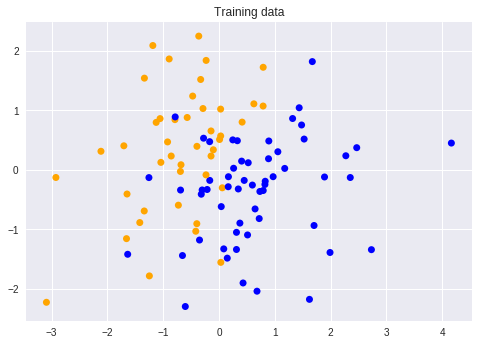

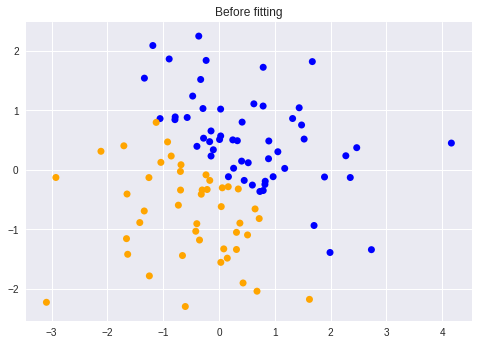

Train accuracy: 0.54
Test accuracy: 0.47


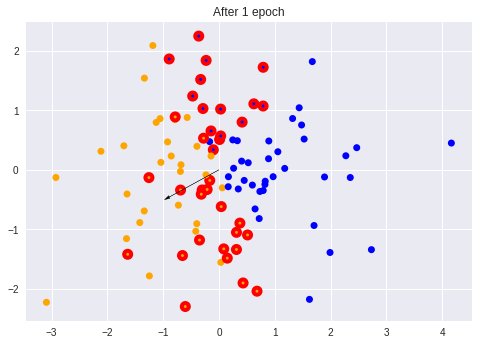

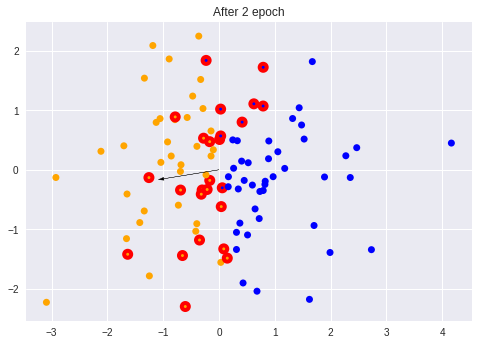

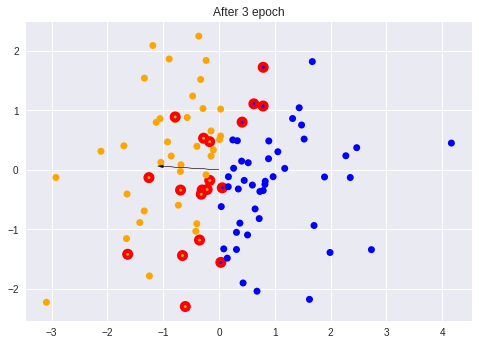

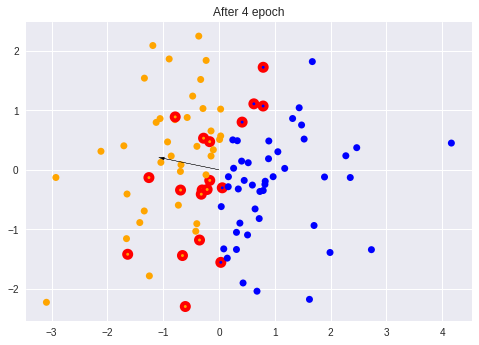

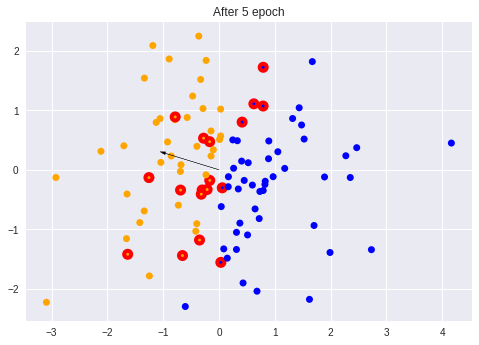

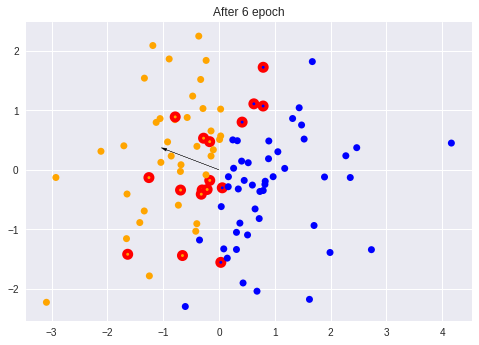

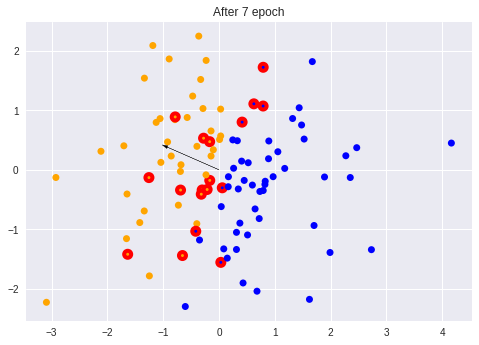

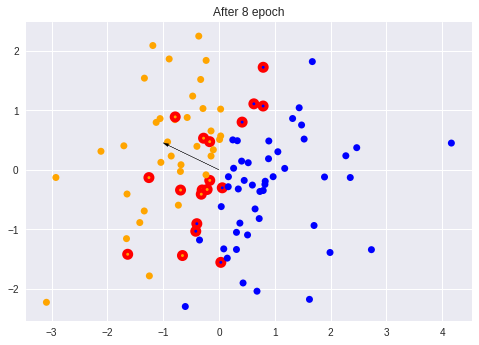

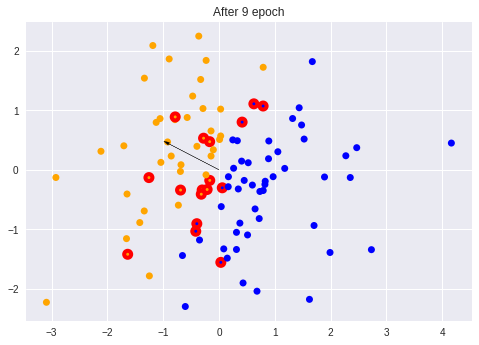

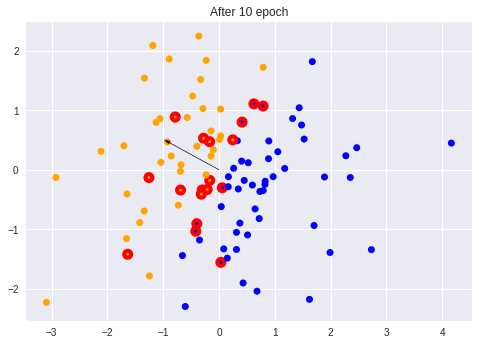

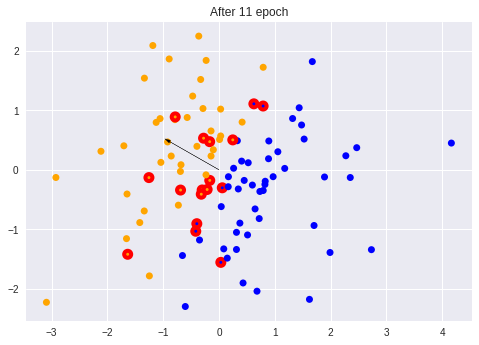

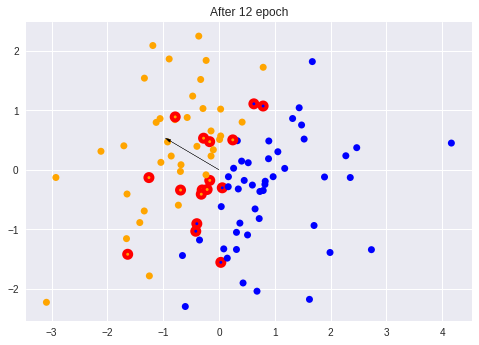

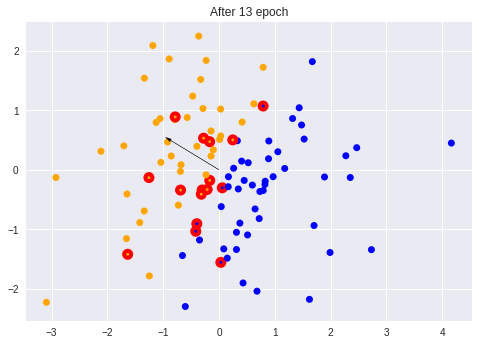

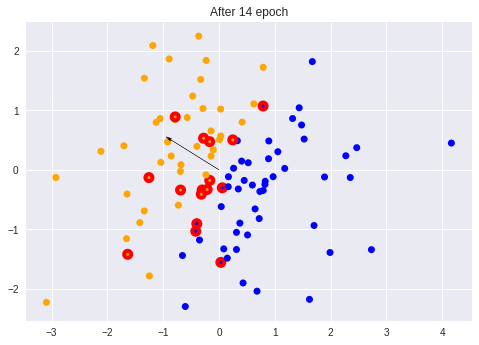

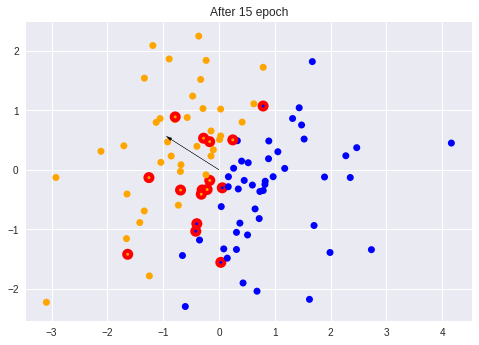

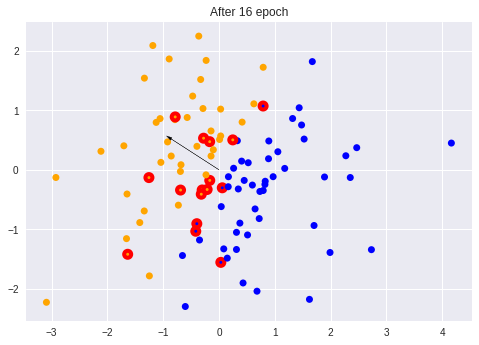

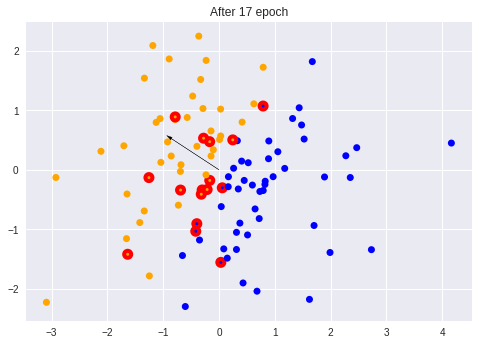

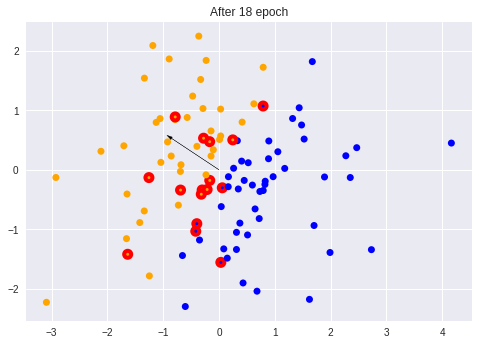

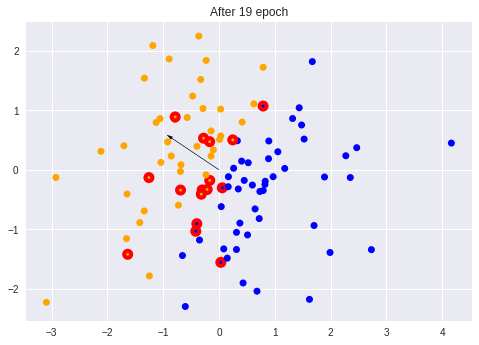

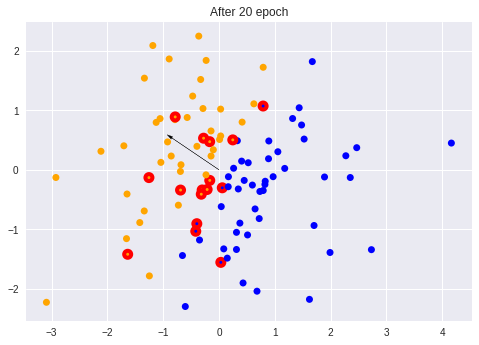

Train accuracy: 0.84
Test accuracy: 0.82


In [7]:
plot_data(train_x, train_y, title="Training data")

model = Model(learning_rate=0.2)

plot_data(train_x, model.predict(train_x), title="Before fitting")
print("Train accuracy:", accuracy(train_y, model.predict(train_x)))
print("Test accuracy:", accuracy(test_y, model.predict(test_x)))

for epoch in range(20):
  model.fit(train_x, train_y)
  plot_data(train_x, model.predict(train_x), train_y, v=model.W, title="After %d epoch" % (epoch+1))


print("Train accuracy:", accuracy(train_y, model.predict(train_x)))
print("Test accuracy:", accuracy(test_y, model.predict(test_x)))